In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import librosa
from tqdm import tqdm_notebook as tqdm
import pickle
import IPython.display as ipd
%matplotlib inline

In [4]:
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from livelossplot import PlotLossesKeras

Load data

In [3]:
data = pd.read_pickle("../../Data/Guitar/guitar-data.pkl")

Set first note to '0'

In [4]:
data["Note"] = librosa.note_to_midi(data["Note"]) - 28

In [5]:
data["Note"].unique()

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 31, 32, 33, 34, 35, 27, 28, 29, 30,
       22, 23, 24, 25, 26, 17, 18, 19, 20, 21, 12, 13, 14, 15, 16,  7,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [8]:
def create_xy(df, target_column):
    return df.drop(target_column, axis=1), df[target_column]

def split_data(df, target_column):
    X_train, y_train = create_xy(df.sample(round(0.8*df.shape[0])), target_column)
    df = df.drop(X_train.index)
    X_val, y_val = create_xy(df.sample(round(0.5*df.shape[0])), target_column)
    df = df.drop(X_val.index)
    X_test, y_test = create_xy(df, target_column)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [7]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Note")

NN using 2000 samples

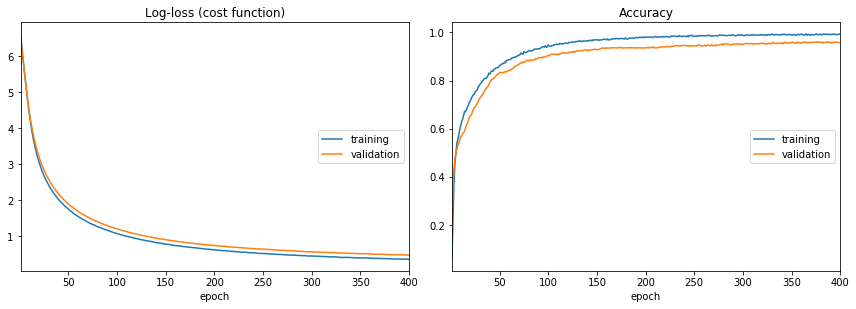

Log-loss (cost function):
training   (min:    0.347, max:    6.621, cur:    0.347)
validation (min:    0.470, max:    6.482, cur:    0.470)

Accuracy:
training   (min:    0.056, max:    0.994, cur:    0.994)
validation (min:    0.184, max:    0.961, cur:    0.958)
Train score: 0.3043646474748538
Train accuracy: 1.0
Validation score: 0.47032113410636245
Validation accuracy: 0.9582172696968971


In [28]:
inputs = Input(shape=(2000,))
hidden1 = Dense(256, kernel_regularizer=l1(0.0002))(inputs)
hidden2 = Dense(128, activation="relu")(hidden1)
hidden2_drop = Dropout(0.25)(hidden2)
preds = Dense(61, activation="softmax")(hidden2_drop)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.00005)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=400, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

Save model

In [29]:
model.save_weights('Guitar_NN_weights.h5')

In [30]:
with open('Guitar_NN_architecture.json', 'w') as f:
    f.write(model.to_json())

## 500 samples

It would be better to use less samples, or it will not be possible to analzye short notes

In [19]:
data = pd.read_pickle("../../Data/Guitar/guitar-data-500.pkl")

In [20]:
data["Note"] = librosa.note_to_midi(data["Note"]) - 28

In [21]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Note")

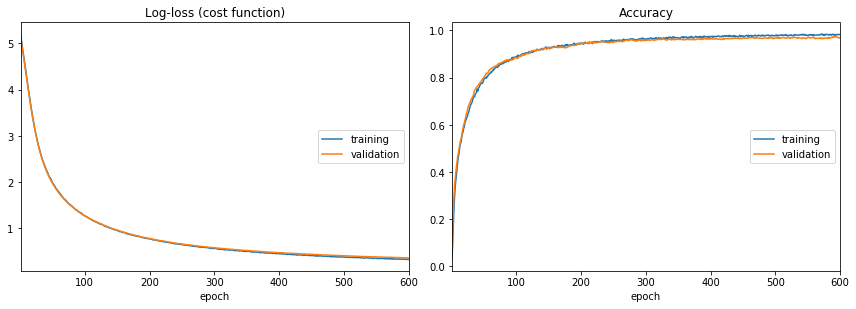

Log-loss (cost function):
training   (min:    0.325, max:    5.206, cur:    0.326)
validation (min:    0.360, max:    5.142, cur:    0.360)

Accuracy:
training   (min:    0.029, max:    0.986, cur:    0.982)
validation (min:    0.068, max:    0.975, cur:    0.968)
Train score: 0.2628532586612768
Train accuracy: 0.9994773519163763
Validation score: 0.36034049712183747
Validation accuracy: 0.967966573816156


In [22]:
inputs = Input(shape=(500,))
hidden1 = Dense(256, kernel_regularizer=l1(0.0002))(inputs)
hidden2 = Dense(128, activation="relu")(hidden1)
hidden2_drop = Dropout(0.25)(hidden2)
preds = Dense(61, activation="softmax")(hidden2_drop)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.00005)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=600, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

Save model

In [23]:
model.save_weights('Guitar_NN_weights.h5')

In [24]:
with open('Guitar_NN_architecture.json', 'w') as f:
    f.write(model.to_json())

## 200 samples

Tried with even less samples, but accuracy drops

In [5]:
data = pd.read_pickle("../../Data/Guitar/guitar-data-200.pkl")

In [6]:
data["Note"] = librosa.note_to_midi(data["Note"]) - 28

In [7]:
data["Note"].unique()

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 31, 32, 33, 34, 35, 27, 28, 29, 30,
       22, 23, 24, 25, 26, 17, 18, 19, 20, 21, 12, 13, 14, 15, 16,  7,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [9]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Note")

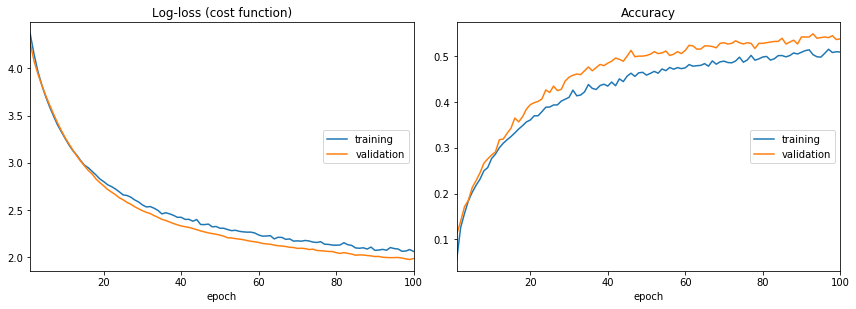

Log-loss (cost function):
training   (min:    2.060, max:    4.368, cur:    2.060)
validation (min:    1.975, max:    4.268, cur:    1.985)

Accuracy:
training   (min:    0.056, max:    0.515, cur:    0.509)
validation (min:    0.111, max:    0.549, cur:    0.538)
Train score: 1.6739892888982952
Train accuracy: 0.6459930313173486
Validation score: 1.9851663896300333
Validation accuracy: 0.5376044566584829


In [17]:
inputs = Input(shape=(200,))
hidden1 = Dense(256, kernel_regularizer=l1(0.0002))(inputs)
hidden1_drop = Dropout(0.1)(hidden1)
hidden2 = Dense(128, kernel_regularizer=l2(0.00), activation="relu")(hidden1_drop)
hidden2_drop = Dropout(0.25)(hidden2)
preds = Dense(61, activation="softmax")(hidden2_drop)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0005)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=100, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

## 200 spectral

Less samples with spectral data looks promising but it has not been implemented.

In [18]:
data = pd.read_pickle("../../Data/Guitar/guitar-data-spectral-200.pkl")

In [19]:
data["Note"] = librosa.note_to_midi(data["Note"]) - 28

In [20]:
data["Note"].unique()

array([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 31, 32, 33, 34, 35, 27, 28, 29, 30,
       22, 23, 24, 25, 26, 17, 18, 19, 20, 21, 12, 13, 14, 15, 16,  7,  8,
        9, 10, 11,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [21]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, "Note")

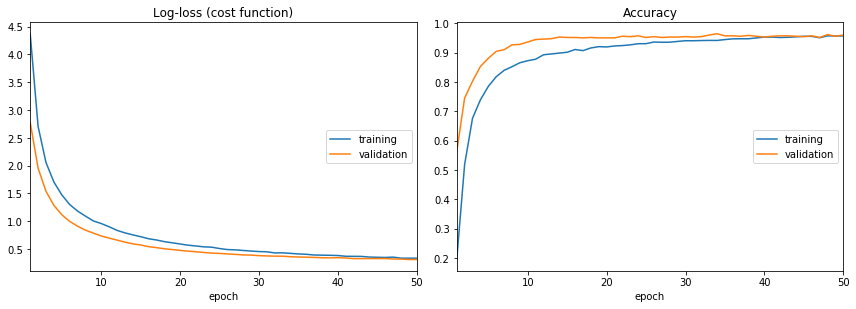

Log-loss (cost function):
training   (min:    0.335, max:    4.371, cur:    0.336)
validation (min:    0.311, max:    2.777, cur:    0.311)

Accuracy:
training   (min:    0.195, max:    0.957, cur:    0.956)
validation (min:    0.563, max:    0.964, cur:    0.960)
Train score: 0.2729568127140351
Train accuracy: 0.978397212543554
Validation score: 0.31144407611537445
Validation accuracy: 0.9596100278551533


In [23]:
inputs = Input(shape=(200,))
hidden1 = Dense(256, kernel_regularizer=l1(0.0002))(inputs)
hidden1_drop = Dropout(0.1)(hidden1)
hidden2 = Dense(128, kernel_regularizer=l2(0.00), activation="relu")(hidden1_drop)
hidden2_drop = Dropout(0.25)(hidden2)
preds = Dense(61, activation="softmax")(hidden2_drop)

model = Model(inputs=inputs, outputs=preds)
sgd = keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=None, epochs=50, verbose=0,
                    validation_data=(X_val, y_val),
                    callbacks=[PlotLossesKeras()])

score_train = model.evaluate(X_train, y_train, verbose=0)
score_val = model.evaluate(X_val, y_val, verbose=0)

score_test = model.evaluate(X_test, y_test, verbose=0) 
print('Train score:', score_train[0])
print('Train accuracy:', score_train[1])
print('Validation score:', score_val[0])
print('Validation accuracy:', score_val[1])

In [24]:
model.save_weights('Guitar_spectral_200_NN_weights.h5')

In [25]:
with open('Guitar_spectral_200_NN_architecture.json', 'w') as f:
    f.write(model.to_json())